# An SOSP model of encoding interference in verb choice and reading times
For a more complete description of the overall SOSP framework see the ClassicAgreementAttraction notebook. 

## A case of encoding interference
Here, we focus on a case of encoding interference in two sentence processing tasks. Encoding interference is when features of words in a sentence that are not relevant for retrieving those words for structure-building nonetheless interfere with parsing. The example we focus on here builds on the results of Barker, Nicol, & Garrett (2001). They used the sentence completion paradigm common in agreement attraction studies using subject NPs like the following:

1. The canoe by the cabin...
2. The canoe by the cabins...
3. The canoe by the sailboat...
4. The canoe by the sailboats...

Barker et al. manipulated the number marking on the second noun (N2; *cabin(s)* or *sailboat(s)*) and the semantic similarity between the first noun (N1; *canoe*) and the N2 (canoes and sailboats are both boats, while canoes and cabins have relatively little in common). They found significantly higher rates of agreement attraction in the semantically similar case than in the semantically dissimilar case. This suggests that the semantic similarity was interfering with participants' ability to choose the correct verb form, even though the semantic similarity is not, on most theories, a cue relevant for determining what the controller of verb number should be.

The standard ACT-R approach to sentence processing (Lewis & Vasishth, 2005) does not predict this result, since the semantic similarity between N1 and N2 is not relevant to retrieving one of the nouns to determine which number marking the verb should have. A reasonable extension of ACT-R based on RACE/A (van Maanen et al., 2009; here, RACE/A was applied to Stroop tasks, not sentence processing), however, does predict Barker et al.'s data. RACE/A proposes that similar items in memory increase each other's activation in proportion to their own activation. If we assume, as in the standard ACT-R framework, that the first item in memory to reach an activation threshold is selected to control verb agreement, then the RACE/A extension predicts the Barker et al. results because the semantically similar N2s in the *canoe/sailboats* condition activate each other, making it more likely that *sailboats* will be selected as the verb's number controller as compared to the *canoe/cabins* condtition. For the same reason, this mechanism should produce faster processing times at the verb in the *canoe/sailboats* condition than in the *canoe/cabins* condition.

As shown below, a simple SOSP model actually produces slower reading times at the verb in the semantically similar condition, in addition to correctly producing parse distributions that accord with the Barker et al. data. To test the differing predictions of the RACE/A-augmented ACT-R approach and SOSP, we ran a self-paced reading experiment with 110 participants using materials inspired by the Barker et al. materials. We found a significant main effect of semantic similarity in the verb region such that residualized log reading times were slower for in the semantically similar conditions (3 & 4 above) than for the semantically dissimilar conditions (1 & 2). Thus, the new reading time results support the SOSP account over the RACE/A-ACT-R account. After walking through the setup of the SOSP model we used, we discuss how SOSP produces this pattern of results.

## A simple SOSP approach to modeling the Barker et al. and new reading time results
To model the Barker et al. results, we make the assumption that the subject NP (e.g., *the canoe by the sailboats*) has already been read/produced. We assume that this has pushed the verb's features toward expecting a the boat-like, singular N1 to be the subject. This is the initial condition for the model to start settling towards a parse. 

We define the dynamics by setting up a harmony landscape with peaks of different heights corresponding to different parses of varying degrees of wellformedness. A major assumption of SOSP is that the parser, at least temporarily, entertails every possible attachment given a string of words, even ungrammatical attachments. Thus, we include these ungrammatical configurations, but because they are ungrammatical, they have quite low harmony values. Recall that the harmony function $HF$ is a sum of Gaussian RBF functions with peaks (centers) at each parse. 

The dimensions code the boat-features on the verb (0 = no boat, 1 = boat), the verb's number feature (0 = sg., 1 = pl.), and the strength of the N2-verb attachment link (we assume that the N1- and N2-verb links are in complementary distribution). The boat features constitute three dimensions in the system, which has the effect of weighting their effect on the harmony function rather heavily compared to, e.g., the single grammatical feature (number) that we included. We believe this is justified, however, since representing the concept *boat* presumably takes many dimensions to encode (+vehicle, +marine_vessel, +floats, etc.).

The `centers` matrix below lists one parse (which will be a harmony peak) on each row. For example, the first row `[1, 1, 1, 0, 0]` specifies that there should be an attractor at the location corresponding to all boat-features being turned on with a singular verb and the N2-verb link inactive. The location (4th row) `0, 0, 0, 0, 1` corresonds to all boat features being off, the verb being singular, and the N2-verb link being active, a poor parse. However, just how good or bad a parse is can depend on the condition, since different conditions involve words with different features.

The matrix `harmony_vals` encodes how well-formed each of the possible parses is in the different conditions. Each column of `harmony_vals` corresponds to a different experimental condtion (in the order *canoe-kayaks, canoe-kayak, canoe-cabins, canoe-cabin*). Each row of `harmony_vals` provides the height of one of the eight harmony peaks in this system. The harmony heights ($h_i$) equal 1 if the parse is perfectly grammatical. For each deviation from perfect grammaticality (here, failing to attach a treelet or having a feature mismatch), the penalties are multiplied. We assume that partial parses in which a treelet fails to attach are penalized less severely (the coefficient `af = 0.8`) than having a complete structure with a mismatching feature (`mf = 0.2`). The first row of `harmony_vals` is all ones because in all conditions, attaching the N1 as the subject with of a singular verb with all its boat features on is perfectly grammatical. If we consider the 4th row again, these values give the height of the harmony peak at `[0, 0, 0, 0, 1]` in each of the four conditions. In the *canoe-kayaks* condition, this parse is penalized for having an attachment failure and two feature mismatches: The plural, boat-like N2 has attached as the verb's subject, but the verb is marked singular (one feature mismatch) and has all boat-features turned off (the second feature mismatch). This parse leaves the N1 just floating, unattached to another treelet, so the parse is also penalized for that. In the *canoe-cabins* condition, though, the penalty is less (only one feature mismatche and an attachment failure): The N2 is still attached as the verb's controller, which results in a feature mismatch, and the N1 is still unattached. So, the ungrammatical `[0, 0, 0, 0, 1]` parse is *less* ill-formed when the N2 is *cabins* than when it is *kayaks*. 

This illustrates how the harmony function $HF$ can assign different harmony values to any configuration of linguistic elements, regardless of whether they can be neatly written down as products of a symbolic grammar. Moreover, these ungrammatical parses affect the processing of grammatical strings by altering the harmony landscape that the system navigates in, even when it doesn't need to navigate close to an ungrammatical structure.

In [2]:
import numpy as np
# Here, we assume three identical boat features, which weights them quite heavily 
# relative to the single number feature
dim_labels = ['boat1', 'boat2', 'boat3', 'pl', 'N2-attach']
condition_labels = ['canoe-kayaks', 'canoe-kayak', 'canoe-cabins', 'canoe-cabin']
ncond = len(condition_labels)

# Dimensions of the state space: [boat1, boat2, boat3, pl, N2-Verb link], +boat=1, +pl=1
# Each row in the following matrix represents the position in the 5D state space of one of the parses.
# There will therefore be a harmony peak at each of these locations that the system might settle to
centers = np.array([[1.,1, 1, 0, 0],
                    [1, 1, 1, 0, 1],
                    [0, 0, 0, 0, 0],
                    [0, 0, 0, 0, 1],
                    [0, 0, 0, 1, 0],
                    [0, 0, 0, 1, 1],
                    [1, 1, 1, 1, 0],
                    [1, 1, 1, 1, 1]])
    
ndim = np.shape(centers)[1]  # number of dimensions

# Setting the initial conditions to reflect the bias N1 has already exerted on the verb, i.e.,
# starting it near the correct attractor
x0 = [0.6, 0.6, 0.6, 0.4, 0.4]

# We now calculate the heights of the harmony peaks
af = 0.8  # cost for failing to attach N1 and attaching N2 instead
mf = 0.2  # cost for having a mismatching feature

# Harmony values: 
# Columns are in same order as cond_labels
# Rows are in the same order as centers
harmony_vals = np.array([[       1,        1,        1,        1],
                         [   af*mf,       af, af*mf*mf,    af*mf],
                         [      mf,       mf,       mf,       mf],
                         [af*mf*mf,    af*mf,    af*mf,       af],
                         [   mf*mf,    mf*mf,    mf*mf,    mf*mf],
                         [   af*mf, af*mf*mf,       af,    af*mf],
                         [      mf,       mf,       mf,       mf],
                         [      af,    af*mf,    af*mf, af*mf*mf]])

The attachment failure and mismatching feature penalties effectively say that the system finds fragmentary speech tolerable and will parse it as such, but it prefers to avoid really bad grammatical errors (feature mismatches). 

Next, we prepare and run the simulations. To see what a typical, noiseless trajectory looks like plotted in the 

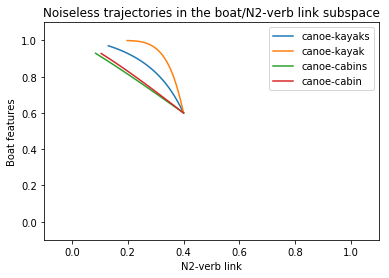

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product

# Defining phi function
def phi(x, center, gamma):
    diff = x - center
    l2norm = np.sqrt(np.dot(diff, diff))
    phi = np.exp(-l2norm**2 / gamma)
    return phi


# A function for updating the state of the system according to the negative
# gradient of the harmony function
def step_dyn(x, centers, harmonies, gamma):
    dx = np.zeros(x.shape)
    for c in range(centers.shape[0]):
        dx += (-2./gamma * harmonies[c]
               * (x - centers[c,:]) * phi(x, centers[c,:], gamma))
    return dx


# Proximity to a fixed point
def not_close(x, centers, tol):
    for c in range(centers.shape[0]):
        diff = x - centers[c]
        l2norm = np.sqrt(np.dot(diff, diff))
        if l2norm < tol:
            #print(centers[c])
            return False
        else:
            return True

# Find out which fp. the system reached
def which_attr(x):
    x = np.round(x)   # Note:  assumes all centers are at corners of [0, 1]^ndim
    for c in range(centers.shape[0]):
        if np.all(x == centers[c,]):
            return c
    return -1


# Singular or plural verb?
def sg_pl(x):
    x = np.round(x)
    if x[-2] == 0:
        return 0
    elif x[-2] == 1:
        return 1
    else:
        return -1


def calc_harmony(x, centers, harmonies, gamma):
    harmony = 0
    for c in range(centers.shape[0]):
        harmony += harmonies[c] * phi(x, centers[c], gamma)
    return harmony


# Setting parameters
gamma = 0.5
maxsteps = 1000
tau = 0.01
tol = 0.2
noisemag = 0.05
nruns = 1

# Running
rts = np.zeros((nruns, ncond))
parses = np.zeros((nruns, ncond))
for cond in range(ncond):
    if nruns is not 1:
        print('\nCondition: {}'.format(condition_labels[cond]))
        print('Of {}: '.format(nruns), end='')
    for run in range(nruns):
        if (run+1) % 100 == 0:
            print('[{}] '.format(run+1), end='')
        x = np.zeros((maxsteps, centers.shape[1]))
        x[0,] = x0
        if nruns is not 1:
            noise = np.random.normal(0, 1, x.shape)
        else:
            noise = np.zeros(x.shape)

        t = 0
        while t < maxsteps-1:
            if not_close(x[t,], centers, tol = tol):
                x[t+1,] = x[t,]+(tau*(step_dyn(x[t,], centers, harmony_vals[:,cond], gamma))
                                 + np.sqrt(noisemag*tau)*noise[t,])
                t += 1
            else:
                break

        xtrunc = x[~np.all(x == 0, axis=1)]
        rts[run, cond] = xtrunc.shape[0]  # Time is noun attraction time, not verb time (???)
        #parses[run, cond] = which_attr(xtrunc[-1,])
        parses[run, cond] = sg_pl(xtrunc[-1,])
    # Plot just the boat-feature/N2-verb-link subspace
    plt.plot(xtrunc[:,ndim-1], xtrunc[:,0], label=condition_labels[cond])  # Boat-Attach


# Plotting trajectories
plt.ylim(-0.1, 1.1)
plt.ylabel('Boat features')
plt.xlim(-0.1, 1.1)
plt.xlabel('N2-verb link')
plt.legend()
plt.title('Noiseless trajectories in the boat/N2-verb link subspace')
plt.show()

The above plot shows noiseless runs in all four conditions. The differences in trajectories reflect differences in the harmony landscape in the four conditions. The strong deflection in the *canoe-kayaks* condition suggests that the attractor corresponding to the boat feature being on and the N2-verb link being active is quite strongly pulling the system against the influence of the grammatical attractor (boat features on and N2-verb link inactive). This pull is also apparent the *canoe-kayak* condition. The deflection in these conditions is caused by the relatively high harmony of parses in which the verb's boat features are turned on. The *cabin(s)* conditions, though, show little deflection, being pulled more directly towards the most grammatical attractor because the

Below, we do repeated Monte Carlo runs to see how the noise affects the trajectories in which parses form and how long it takes.


Condition: canoe-kayaks
Of 100: [100] 
Condition: canoe-kayak
Of 100: [100] 
Condition: canoe-cabins
Of 100: [100] 
Condition: canoe-cabin
Of 100: [100] 
Parses:

canoe-kayaks:
	Parse:	Proportion of runs:
	---------------------------
	Vsg:	0.97
	Vpl:	0.03
canoe-kayak:
	Parse:	Proportion of runs:
	---------------------------
	Vsg:	1.0
canoe-cabins:
	Parse:	Proportion of runs:
	---------------------------
	Vsg:	0.99
	Vpl:	0.01
canoe-cabin:
	Parse:	Proportion of runs:
	---------------------------
	Vsg:	1.0
RTs:	canoe-kayaks	canoe-kayak	canoe-cabins	canoe-cabin

Mean =	[ 145.82  172.48  104.26  110.48]
SD =	[ 157.267  129.706   95.241   96.21 ]


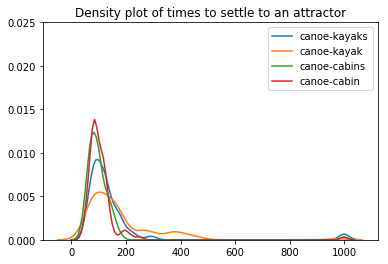

In [9]:
# Running
nruns = 100
rts = np.zeros((nruns, ncond))
parses = np.zeros((nruns, ncond))
for cond in range(ncond):
    if nruns is not 1:
        print('\nCondition: {}'.format(condition_labels[cond]))
        print('Of {}: '.format(nruns), end='')
    for run in range(nruns):
        if (run+1) % 100 == 0:
            print('[{}] '.format(run+1), end='')
        x = np.zeros((maxsteps, centers.shape[1]))
        x[0,] = x0
        if nruns is not 1:
            noise = np.random.normal(0, 1, x.shape)
        else:
            noise = np.zeros(x.shape)

        t = 0
        while t < maxsteps-1:
            if not_close(x[t,], centers, tol = tol):
                x[t+1,] = x[t,]+(tau*(step_dyn(x[t,], centers, harmony_vals[:,cond], gamma))
                                 + np.sqrt(noisemag*tau)*noise[t,])
                t += 1
            else:
                break

        xtrunc = x[~np.all(x == 0, axis=1)]
        rts[run, cond] = xtrunc.shape[0]  # Time is noun attraction time, not verb time (???)
        #parses[run, cond] = which_attr(xtrunc[-1,])
        parses[run, cond] = sg_pl(xtrunc[-1,])

print('\nParses:\n')
parse_labels = ['Vsg', 'Vpl', 'other']
for cond in range(ncond):
    uniq, cts = np.unique(parses[:,cond], return_counts=True)
    print('{}:'.format(condition_labels[cond]))
    print('\tParse:\tProportion of runs:')
    print('\t{}'.format(''.join(['-']*27)))
    for u in range(len(uniq)):
        if cts[u] is not 0:
            print('\t{}:\t{}'.format(parse_labels[u], cts[u]/nruns))
print('RTs:\t{}\t{}\t{}\t{}'.format(*condition_labels))
print('\nMean =\t{}\nSD =\t{}'.format(np.mean(rts, axis=0), np.round(np.std(rts, axis=0), 3)))
for cond in range(4):
    # Density plot of settling times
    sns.kdeplot(rts[:,cond], label=condition_labels[cond])
plt.title('Density plot of times to settle to an attractor')
plt.ylim(0, 0.025)
plt.show()

## Discussion
Overall, we this simulation replicates Barker et al. (2001)'s finding of increased agreement attraction when N1 and N2 are semantically similar compared to when they are semantically dissimilar. Moreover, it makes the novel prediction that reading times at the verb should be slower in the similar condition than in the dissimilar condition. This prediction has received initial support from new self-paced reading data in Smith, Franck, and Tabor (in progress), where we found a main effect of semantic similarity at the verb in the same direction as the simulations here.

What’s happening in this simulation is that the model is mostly building a parse where it attaches the verb to N1, but sometimes attaching to N2 and it's generating a verb that matches the features of N2 on the Boat and Number dimensions.  It does this relatively often for *canoe by the kayaks* because of it's initial journey in the direction of forming the parse for *canoe is* starts turning on all the +Boat features and thus brings it somewhat near the state that it need to be in to take *kayaks* as a subject (the noise therefore sometimes manages to bump into this state.). It does this relatively rarely for *canoe by the cabins* because *cabins* needs all the boat features turned off so the state of having *cabins* as subject is further away (it is not as likely that the noise to jostle it into this state).

Initially, the state starts off completely unbiased in all features, then canoe is read, and this pushes the features a little bit toward +Boat, -Plural. Then N2 is read, and the potential of attaching the verb to N2 pulls the features in various directions. When N2 is *kayak*, the system is pulled toward attachment to N2 with treelet features at [+Boat (x3), -Plural]. This state is quite near attachment to N1 (the correct attachment)---the only thing that’s different about it is the link value and the missing attachments to N1 so it exerts very strong competition. When N2 is *kayaks*, the pull is still strong, but a little less so because the plural feature of *kayaks* makes N2 attachment less similar to N1 attachment. But if N2 is either *cabin* or *cabins*, the pull is relatively weak since all the semantic feature differences make these parses quite different from the current state. After some settling under the influence of N2, the verb itself is read. In order to finish processing the verb, the system must get reasonably close (tol = 0.2, Euclidean distance) to a stable state. The verb, which is *is*, exerts a force that pushes the system toward the singular state. In the condition *canoe near kayak*, there is high resistance to the force of *is* from the possibility of making *kayak* the subject. In the condition *canoe near kayaks*, there is still quite a bit of resistance, though it's a little less, as described above. In the *cabin* and *cabins* condition, there is relatively little resistance.   In other words, *kayak* is slowest, *kayaks* is faster, but still pretty slow; *cabin* and *cabins* are both faster.    (Note that the time to process *is* is closely correlated with the time it would have taken the system to reach the parse of *is* based on just perceiving *(the) N1 (near the) N2*. Because it was simpler to program, the times reported above are actually simply the times to convergence after processing N2).

It is true that the model actually generates both a main effect of Similarity and possibly an interaction between N2 number and semantic similarity, whereas we only observed a main effect of similarity. We assume this is because the experimental design was not powerful enough to detect the interaction.